# **Data Jobs Salaries in February 2023 in Mexico** (Part 1)
____


Author: **Daniel Eduardo López**

**07/02/2023**

<a href="https://www.linkedin.com/in/daniel-eduardo-lopez"><font size="-1">LinkedIn</font></a> 

<a href="https://github.com/DanielEduardoLopez"><font size="-1">GitHub </font></a>

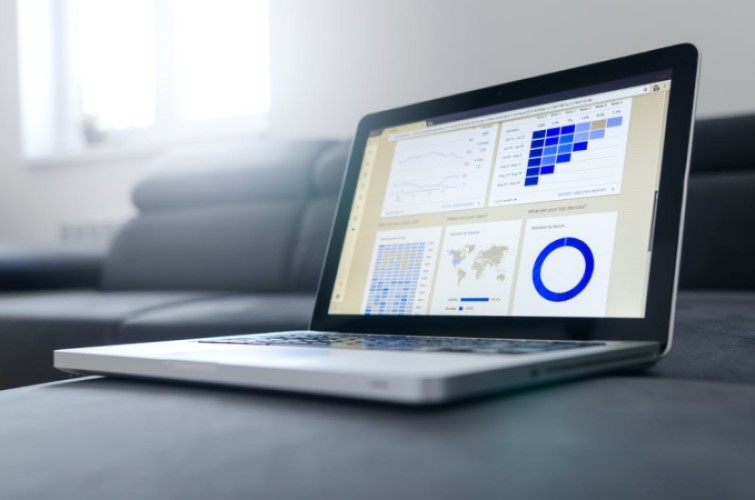

<font size="-1">Image Credit: <a href="https://www.pexels.com/es-es/foto/foto-de-primer-plano-del-portatil-gris-577210/"> Lukas </a></font>

___
## **1. Introduction**
___

With the emergence of the big data, new jobs have appeared demanding new sets of skills and expertise for extracting value from data (Axis Talent, 2020):

- Business Analysts (BA)
- Data Analysts (DA)
- Data Architects (DR) 
- Data Engineers (DE) 
- Data Scientists (DS)

Which one is the most valued in the Mexican labor market currently?

____
#### **General Objective**
To identify which data job category has the highest salary in the Mexican labor market in February 2023 according to the OCC website.
____
#### **Research Question**
Which data job category has the highest salary in the Mexican labor market in February 2023 according to the OCC website?
____
#### **Hypothesis**
The **Data Scientist** position has the highest salary in the Mexican labor market in February 2023 according to the OCC website.
____
#### **Abridged Methodology**
The methodology of the present study is based on Rollin’s Foundational Methodology for Data Science (Rollins, 2015).

1) **Analytical approach**: Descriptive and inferential statistics.
2) **Data requirements**: Data about job positions such as job name, salary, employer and location.
3) **Data collection**: Data was collected from the OCC Website (Mexico) on 07 February 2022, through web scraping with Python 3 and its libraries Selenium and BeautifulSoup.
4) **Data exploration and preparation**: Data then was explored and cleaned with Python 3 and its libraries Pandas and Numpy. 
5) **Data analysis**: Data was analyzed with Python 3 and its libraries Pandas, Scipy and Statsmodels and visualized with Matplotlib, Seaborn, Folium and Plotly. 
6) **Statistical analysis**: The D'Agostino-Pearson normality test was used to assess the normality of the data jobs salary distribution. Then, both parametric (ANOVA and t-test with unequal variance) and non-parametric (Mann-Whitney U and Kruskal-Wallis H) tests were carried out to assess the significance of the obtained results.

Furthermore:

7) A **dashboard** was built with Python 3 and its libraries Plotly and Dash.
8) A **final report** was written with the complete results obtained from the data.
9) Some **slides** were prepared with the **most important insights** from the report.

___
#### **Notebook's Goal**

In this context, the purpose of this notebook is to retrieve job data from the <a href = "https://www.occ.com.mx/">OCC's website </a> through web scraping.

In [ ]:
# Loading Requirements Text File
#!pip install -r requirements.txt

In [1]:
# Libraries installation
!pip install pipreqsnb
!pip install selenium
!pip install webdriver_manager

You should consider upgrading via the 'c:\Users\dlope\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\dlope\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\dlope\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
# Libraries importation
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.firefox.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime

___
## **2. Data Collection**
___

In order to collect the data, two functions were defined: 
- **occscraper**, which scrapes the OCC website and returns the results in a Pandas dataframe, and
- **get_classid**, which returns a sample of the OCC website to allow to identify the current class IDs of the site to effectively perform the web scraping.

The OCC website dynamically sets the class identifiers for its page elements. So, to perform the web scraping, first, it is strongly advised to first execute the **get_classid** function, then **inspect** what are the **current class identifiers** and finally execute the **occscraper** function to produce the desired results.

In addition, please note that this code works with **_Mozilla Firefox_** as the web browser.


In [30]:
# Function to scrape job data from OCC.com.mx
def occscraper(jobs_list, number_pages, vacancy_class, jobname_class, salary_class, company_class, location_class, location_class_2):
    """
    This function scrapes job data from the OCC Website (occ.com.mx): Position Name, Salary, Company and Location.

    IMPORTANT NOTE: OCC Website dynamically sets the class identifiers for its page elements. So, surely the example class 
    identifiers will not produce results when running the present code in a different moment than the one when this code was 
    written and run. Thus, to RE-RUN the code, first, it is strongly advised to first execute the get_classid() function and then 
    INSPECT what are the CURRENT class identifiers to produce NEW results.

    IMPORTANT NOTE 2: This code works with Mozilla Firefox web browser, do not try to run this notebook in Google Colab,
    but run this code in your system instead.

    Parameters

    jobs_list: List with the name of the Data Jobs in both English and Spanish and avoiding empty words (Python list of strings).
    number_pages: Number of pages to scrap from the website (Integer).
    vacancy_class: Class identifier for the vacancy (String)
    jobname_class: Class identifier for the name of the position (String)
    salary_class: Class identifier for the salary of the position (String)
    company_class: Class identifier for the company offering the position (String)
    location_class: Class identifier for the geographical location of the position (String)
    location_class_2: Second class identifier for the geographical location of the position (String)

    Returns 

    df: Pandas Dataframe with the results in a tabular form from the web scraping.    
    """

    # Setting of the base url of the OCC searcher
    base_url = "https://www.occ.com.mx/empleos/de-"
    base_page_url = "?page="

    # Creation of the corresponding url for each job from the jobs list
    jobs_url_list = list(jobs_list)
    length = len(jobs_url_list)

    for i in range(0,length):
        jobs_url_list[i] = jobs_url_list[i].strip()
        jobs_url_list[i] = jobs_url_list[i].lower()
        jobs_url_list[i] = jobs_url_list[i].replace(' ','-')
        jobs_url_list[i] = base_url + jobs_url_list[i]
        jobs_url_list[i] = jobs_url_list[i] + '/'
        #print(jobs_url_list[i])

    # Setting of the executable path in a new service instance 
    service = Service(executable_path=GeckoDriverManager().install())

    # Creation of a new instance of the Firefox driver
    driver = webdriver.Firefox(service = service)
    driver.implicitly_wait(2) # Works perfect

    # Creation of the list to store the data
    data = []

    # Iterations over the different jobs
    for job_url in jobs_url_list:
        
        # Start of the loop
        print('Fetching data for:', jobs_list[jobs_url_list.index(job_url)].title(), 
            ' ({} out of {})'.format(jobs_url_list.index(job_url)+1, length))
        
        # Creation of the different pages for the job
        pages_url_list = []
        for j in range(1, number_pages + 1):
            if j == 1:
                pages_url_list.append(job_url)
            else:
                pages_url_list.append(job_url + base_page_url + str(j))
            
        # Web scrapping over the different pages
        for url in pages_url_list:
            
            # Adding try tag in case urls might have a problem
            try:
                # Soup creation
                driver.get(url)
                # wait = wait(driver, 10) # Didn't work
                # salary = wait.until(EC.visibility_of_element_located((By.CLASS_NAME, salary_class))) # Didn't work

                html = driver.page_source
                soup = BeautifulSoup(html, 'html.parser')
                
                # Data extraction
                vacancies = soup.find_all('div', attrs = {'class': vacancy_class})
                
                for vacancy in vacancies:
                    job = []
                    
                    try:
                        job.append(vacancy.find('h2', attrs = {'class': jobname_class}).text)
                    except:
                        job.append(np.nan) # In case there is no job name available

                    
                    try:
                        #job.append(driver.find_element(By.CLASS_NAME, salary_class))
                        job.append(vacancy.find('span', attrs = {'class': salary_class}).text)
                    except:
                        job.append(np.nan) # In case there is no salary available
                    
                    try:
                        job.append(vacancy.find('a', attrs = {'class': company_class}).text)
                    except:
                        job.append(np.nan) # In case there is no company name available

                    try:
                        job.append(vacancy.find('p', attrs = {'class': location_class}).text) # Trying with first location class
                    except:
                        
                        try:
                            job.append(vacancy.find('p', attrs = {'class': location_class_2}).text) # Trying with second location class
                        except:
                            job.append(np.nan) # In case there is no location available

                    data.append(job)
            
            except:
                continue
        
        # End of the urls loop
        print('Successfully retrieved data for:', jobs_list[jobs_url_list.index(job_url)].title(),
            ' ({} out of {})'.format(jobs_url_list.index(job_url) + 1, length) +'\n')

    # End of the main loop
    print('Job done!\n\n')

    # Closure of the Driver
    driver.quit()

    # Store results as a data frame
    df = pd.DataFrame(data, columns = ['Job','Salary','Company','Location'])

    return df

In [4]:
# Function to get OCC's current Class IDs
def get_classid(jobs_list):
    """
    This function retrieves a sample of the OCC's website to allow the user to identify the current Class IDs for the relevant page elements, in order to allow the
    subsequent web scraping of the page.
    
    It is important to note that OCC Website dynamically sets the class identifiers for its page elements. Thus, to effectively scrape the website, first, it is necessary 
    to the load the a sample of page source and then INSPECT what are the CURRENT class identifiers to produce results.

    IMPORTANT NOTE: This code works with Mozilla Firefox web browser.

    Parameters
    
    jobs_list: List with the name of the Data Jobs in both English and Spanish and avoiding empty words (Python list of strings).

    Returns
    
    html_test: Sample of the OCC's website for the first job in the jobs list.
    """
    
    # Setting of the executable path in a new service instance 
    service = Service(executable_path=GeckoDriverManager().install())

    # Creation of a new instance of the Firefox driver
    driver = webdriver.Firefox(service = service)
    
    # Setting of the base url of the OCC searcher
    base_url = "https://www.occ.com.mx/empleos/de-"
    
    # Creation of the corresponding url for each job from the jobs list
    jobs_url_list = list(jobs_list)
    length = len(jobs_url_list)

    for i in range(0,length):
        jobs_url_list[i] = jobs_url_list[i].strip()
        jobs_url_list[i] = jobs_url_list[i].lower()
        jobs_url_list[i] = jobs_url_list[i].replace(' ','-')
        jobs_url_list[i] = base_url + jobs_url_list[i]
        jobs_url_list[i] = jobs_url_list[i] + '/'
            
    # Request of the sample page source
    driver.get(jobs_url_list[0])
    html_test = driver.page_source

    # Closure of the Driver
    driver.quit()

    return html_test

After the two previous functions were defined to perform the web scraping, a list of the most common data jobs was defined based on <a href="https://www.axistalent.io/blog/the-ecosystem-of-data-jobs-making-sense-of-the-data-job-market"> Axistalent (2020)</a>.

In [5]:
# Entry of the Data Jobs in both English and Spanish (avoid empty words) in a Python list

jobs_list = ["analista datos",
           "data analyst",
           "cientifico datos",
           "data scientist",
           "ingeniero datos",
           "data engineer",
           "arquitecto datos",
           "data arquitect",
           "analista negocio",
           "business analyst"]

The number of results pages to scrap was arbitrarily set to 10.

In [37]:
# Number of pages to scrap
number_pages = 10

As mentioned before, the function **_get_classid_** was used to get a sample of the OCC website to allow to identify the current class IDs to effectively perform the web scraping.

In [7]:
# Retrieval of the current class identifiers from the OCC Website
get_classid(jobs_list)



====== WebDriver manager ======
Current firefox version is 109.0
Get LATEST geckodriver version for 109.0 firefox
Getting latest mozilla release info for v0.32.1
Trying to download new driver from https://github.com/mozilla/geckodriver/releases/download/v0.32.1/geckodriver-v0.32.1-win64.zip
Driver has been saved in cache [C:\Users\dlope\.wdm\drivers\geckodriver\win64\v0.32.1]


'<html class="windows desktop landscape" lang="en"><head><meta charset="utf-8"><meta name="traceparent" content="00-ab42124a3c573678d4d8b21ba52df3bf-d21f7bc17caa5aba-01"><link rel="icon" type="image/x-icon" href="https://cdn-h4.occ.com.mx/images/common/favicon.png"><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-NN66T7"></script><script type="text/javascript" async="">\n          function downloadJSAtOnload() {\n              var element = document.createElement("script");\n              element.src = "https://www.occ.com.mx/sitemaps-home/pixeles/scripts.js";\n              document.body.appendChild(element);\n            }\n            if (window.addEventListener)\n              window.addEventListener("load", downloadJSAtOnload, false);\n            else if (window.attachEvent)\n       

So, from the sample of the website above, the appropriate class ids were identified. 

Please note that for the classes of interest (vacancy, job name, salary, company and location), their class types are as follows:

* **Vacancy**: *div* class
* **Job name**: *h2* class
* **Salary**: *span* class
* **Company**: *a* class
* **Location**: *p* class

For instance, from the below example:

```html
<div id="jobcard-16273963" class="card-0-2-518 flat-0-2-520 card-0-2-553"> # vacancy_class
    <a class="jobcard-0-2-558" aria-label="Vacante ANALISTA DE DATOS" id="3" href="/empleo/oferta/16273963-analista-de-datos/?ai=false&amp;origin=unknown&amp;page=1&amp;rank=3&amp;returnURL=%2Fempleos%2Fde-analista-datos%2F%233&amp;sessionid=&amp;showseo=true&amp;type=0&amp;userid=&amp;uuid=93e2ebc1-1d9b-40dd-b8b8-ccd3d400ed39&amp;widgetCompany=false&amp;geolocation=false"></a>
    <div class="conFluid-0-2-60 gridContainer-0-2-570">
        <div class="row-0-2-173 cardContent-0-2-557">
            <div class="col-0-2-174 xs12-0-2-443 ribbonCol-0-2-576 formatCol-0-2-571">
                <div class="flex-0-2-4 jbetween-0-2-16 astart-0-2-19"><div class="flex-0-2-4 wrap-0-2-11 astart-0-2-19">
                    <label class="text-0-2-82 small-0-2-90 highEmphasis-0-2-103 date-0-2-567">Hace 1 día </label>
                </div>
            </div>
        </div>
        <div class="col-0-2-174 xs12-0-2-443 formatCol-0-2-571">
            <div class="flex-0-2-4 wrap-0-2-11">
                <h2 class="text-0-2-82 subheading-0-2-86 highEmphasis-0-2-103 job-0-2-556 longWord-0-2-575">ANALISTA DE DATOS</h2> # jobname_class
            </div>
        </div>
        <div class="col-0-2-174 xs12-0-2-443 formatCol-0-2-571 smallBottomSpace-0-2-573">
            <span class="text-0-2-82 standard-0-2-89 highEmphasis-0-2-103 salary-0-2-559">Sueldo no mostrado por la empresa</span> # salary_class
        </div>
        <div class="fresnel-container fresnel-at-sm "></div>
            <div class="col-0-2-174 xs12-0-2-443 formatCol-0-2-571">
                <div class="flex-0-2-4 acenter-0-2-21">
                    <div class="" style="flex:1">
                        <div class="flex-0-2-4 jbetween-0-2-16 acenter-0-2-21">
                            <div>
                                <label class="text-0-2-82 standard-0-2-89 highEmphasis-0-2-103 strong-0-2-92 linkContainer-0-2-565">
                                    <a class="locContainer-0-2-564 companyLink-0-2-566 noClickable-0-2-581" title="Buscar empleos en Hitss" href="/empleos/bolsa-de-trabajo-Hitss/"> # company_class
                                    <div class="fresnel-container fresnel-lessThan-sm "></div>
                                    <div class="fresnel-container fresnel-greaterThanOrEqual-sm ">Hitss</div> 
                                    </a>
                                </label>
                                <p class="text-0-2-82 small-0-2-90 highEmphasis-0-2-103 zonesLinks-0-2-601"> # location_class
                                    <a title="Empleos en Ciudad de México" class="link-0-2-602 metalink-0-2-603 linkNoMarginRight-0-2-604" href="/empleos/en-ciudad-de-mexico/">CDMX</a> 
                                </p>
                            </div>
                        </div>
                        <div class="fresnel-container fresnel-greaterThan-sm "></div>
                    </div>
                </div>
            </div>
```

The appropriate class ids were:

* **Vacancy** = ```'card-0-2-518 flat-0-2-520 card-0-2-553'```
* **Job name** = ```'text-0-2-82 subheading-0-2-86 highEmphasis-0-2-103 job-0-2-556 longWord-0-2-575'```
* **Salary** = ```'text-0-2-82 standard-0-2-89 highEmphasis-0-2-103 salary-0-2-559'```
* **Company** = ```'locContainer-0-2-564 companyLink-0-2-566 noClickable-0-2-581'```
* **Location** = ```'text-0-2-82 small-0-2-90 highEmphasis-0-2-103 zonesLinks-0-2-601'```

It is important to bear in mind that as of February 2023, the OCC website uses two different classes for marking the location of a vacancy. In this sense, two different location classes were defined below to get as much information as possible.

In [31]:
# Entry of the OCC Website class identifiers
vacancy_class = 'card-0-2-518 flat-0-2-520 card-0-2-553' # div class
jobname_class = 'text-0-2-82 subheading-0-2-86 highEmphasis-0-2-103 job-0-2-556 longWord-0-2-575' # h2 class
salary_class = 'text-0-2-82 standard-0-2-89 highEmphasis-0-2-103 salary-0-2-559' # span class 
company_class = 'locContainer-0-2-564 companyLink-0-2-566 noClickable-0-2-581' # a class
location_class = 'text-0-2-82 small-0-2-90 highEmphasis-0-2-103 zonesLinks-0-2-601' # p class
location_class_2 = 'text-0-2-82 small-0-2-90 highEmphasis-0-2-103 zonesLinks-0-2-584' # p class

In [38]:
# Current time
ct = datetime.datetime.now()
print("current time:", ct)

current time: 2023-02-07 21:33:11.785055


In [39]:
# Call of the web scraping function
df = occscraper(jobs_list, number_pages, vacancy_class, jobname_class, salary_class, company_class, location_class, location_class_2)



====== WebDriver manager ======
Current firefox version is 109.0
Get LATEST geckodriver version for 109.0 firefox
Driver [C:\Users\dlope\.wdm\drivers\geckodriver\win64\v0.32.1\geckodriver.exe] found in cache


Fetching data for: Analista Datos  (1 out of 10)
Successfully retrieved data for: Analista Datos  (1 out of 10)

Fetching data for: Data Analyst  (2 out of 10)
Successfully retrieved data for: Data Analyst  (2 out of 10)

Fetching data for: Cientifico Datos  (3 out of 10)
Successfully retrieved data for: Cientifico Datos  (3 out of 10)

Fetching data for: Data Scientist  (4 out of 10)
Successfully retrieved data for: Data Scientist  (4 out of 10)

Fetching data for: Ingeniero Datos  (5 out of 10)
Successfully retrieved data for: Ingeniero Datos  (5 out of 10)

Fetching data for: Data Engineer  (6 out of 10)
Successfully retrieved data for: Data Engineer  (6 out of 10)

Fetching data for: Arquitecto Datos  (7 out of 10)
Successfully retrieved data for: Arquitecto Datos  (7 out of 10)

Fetching data for: Data Arquitect  (8 out of 10)
Successfully retrieved data for: Data Arquitect  (8 out of 10)

Fetching data for: Analista Negocio  (9 out of 10)
Successfully retrieved data for: Analista

In [40]:
df.head(10)

,Job,Salary,Company,Location
0,ANALISTA DE DATOS,Sueldo no mostrado por la empresa,NaN,"Cuautitlán Izcalli, Edo. Méx.​"
1,ANALISTA DE DATOS,Sueldo no mostrado por la empresa,Hitss,CDMX
2,Analista de Datos,"$20,000 - $25,000 Mensual",Aceros Levinson S.A. d...,"Monterrey, N.L."
3,Analista de datos (por incapacidad),"$17,000 - $18,000 Mensual",Sky,"Benito Juárez, CDMX"
4,Analista de Datos y Costos,"$15,000 - $18,000 Mensual",NaN,"San Miguel de Allende, Gto."
5,Analista de Datos Bussines Intelligence,Sueldo no mostrado por la empresa,Comercializadora de Va...,"Guadalajara, Jal."
6,Analista de datos maestros SAP,Sueldo no mostrado por la empresa,"Productos Verde Valle,...","Zapopan, Jal."
7,Analista base de datos,"$30,000 - $35,000 Mensual",Servicios TVM de Méxic...,"Miguel Hidalgo, CDMX"
8,Bases de Datos Analista,"$15,000 Mensual","Manpower, S.A. de C.V.","San Luis Potosí, SLP."
9,Analista de Base de Datos,"$15,000 - $16,000 Mensual",Grupo Daisa,"Cuauhtémoc, CDMX"


In [42]:
df.tail(10)

,Job,Salary,Company,Location
1282,Financial Analyst,Sueldo no mostrado por la empresa,Michael Page,"Tijuana, BC."
1283,Workday Functional Analyst,Sueldo no mostrado por la empresa,"Manpower, S.A. de C.V.","Monterrey, N.L."
1284,PDM / Data Entry Analyst,"$16,000 - $18,000 Mensual",Grupo Assa Abloy,"Santa María Tequepexpan, Tlaquepaque, Jal."
1285,Analista Contable,"$22,000 Mensual",NaN,"Altamira, Tamps."
1286,IT Web Systems Analyst,Sueldo no mostrado por la empresa,Michael Page,"Guadalajara, Jal."
1287,Cost Analyst,Sueldo no mostrado por la empresa,Eaton Corporation,"Aguascalientes, Ags."
1288,Sales Support and Shared Services Representative,Sueldo no mostrado por la empresa,NaN,CDMX
1289,B2C Inventory Analyst (Temporary),Sueldo no mostrado por la empresa,PHILIP MORRIS MEXICO,CDMX
1290,"General Accounting Specialist, Senior",Sueldo no mostrado por la empresa,NaN,Qro.
1291,Analista de planeación financiera (recien grad...,"$20,000 - $23,000 Mensual",NaN,"Guadalajara, Jal."


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job       1292 non-null   object
 1   Salary    1292 non-null   object
 2   Company   1061 non-null   object
 3   Location  1292 non-null   object
dtypes: object(4)
memory usage: 40.5+ KB


Almost no empty values were retrieved for the desired data attributes. So, the web scraping process was successful. 

Then, the data collected was exported to a CSV file.

In [44]:
# Data exporting to a CSV file
df.to_csv('Dataset.csv', index=False, encoding='utf-8')

**Python Requirements File:**

In [1]:
!pipreqsnb .

pipreqs  .


INFO: Successfully saved requirements file in .\requirements.txt


In [ ]:
# End